### Dealing with missing values

In [24]:
import pandas as pd

In [25]:
DataFrame = pd.read_csv("Academic_Performance.csv")
df = DataFrame.copy()

In [26]:
df.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS


### a) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [29]:
missing_values = df.isnull().sum()
print(missing_values)

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64


In [32]:
df.dtypes

STUDENT_ID             object
GENDER                 object
PLACEMENT              object
HONOR_OPTED_OR_NOT     object
EDUCATION_TYPE         object
ACADEMIC_PROGRAM       object
COURSE 1 MARKS        float64
COURSE 2 MARKS        float64
COURSE 3 MARKS        float64
COURSE 4 MARKS        float64
COURSE 5 MARKS        float64
PERCENTILE              int64
OVEARLL_GRADE          object
dtype: object

In [33]:
from sklearn.impute import SimpleImputer

In [36]:
imputer1 = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
imputer2 = SimpleImputer(strategy='mean',missing_values=np.nan)

In [38]:
df[['GENDER','PLACEMENT','EDUCATION_TYPE','ACADEMIC_PROGRAM']]=imputer1.fit_transform(df[['GENDER','PLACEMENT','EDUCATION_TYPE','ACADEMIC_PROGRAM']])

In [39]:
df[['COURSE 1 MARKS','COURSE 2 MARKS','COURSE 3 MARKS','COURSE 4 MARKS','COURSE 5 MARKS']]=imputer2.fit_transform(df[['COURSE 1 MARKS','COURSE 2 MARKS','COURSE 3 MARKS','COURSE 4 MARKS','COURSE 5 MARKS']])

In [40]:
df.isnull().sum()

STUDENT_ID             0
GENDER                 0
PLACEMENT              0
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE         0
ACADEMIC_PROGRAM       0
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS         0
COURSE 4 MARKS         0
COURSE 5 MARKS         0
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [41]:
df['HONOR_OPTED_OR_NOT'].unique()

array(['Yes', 'No', nan], dtype=object)

In [42]:
df['HONOR_OPTED_OR_NOT']=df['HONOR_OPTED_OR_NOT'].fillna('No')

In [43]:
df['HONOR_OPTED_OR_NOT'].isnull().sum()

0

In [44]:
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

### b) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

In [45]:
import seaborn as sns

In [46]:
import matplotlib.pyplot as pyplot

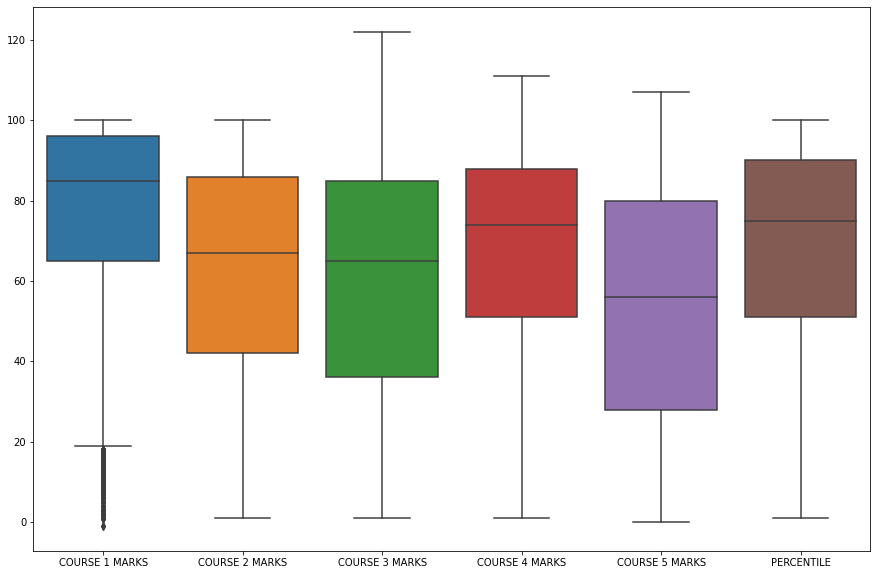

In [47]:
pyplot.figure(figsize=(15,10))
sns.boxplot(data=df)

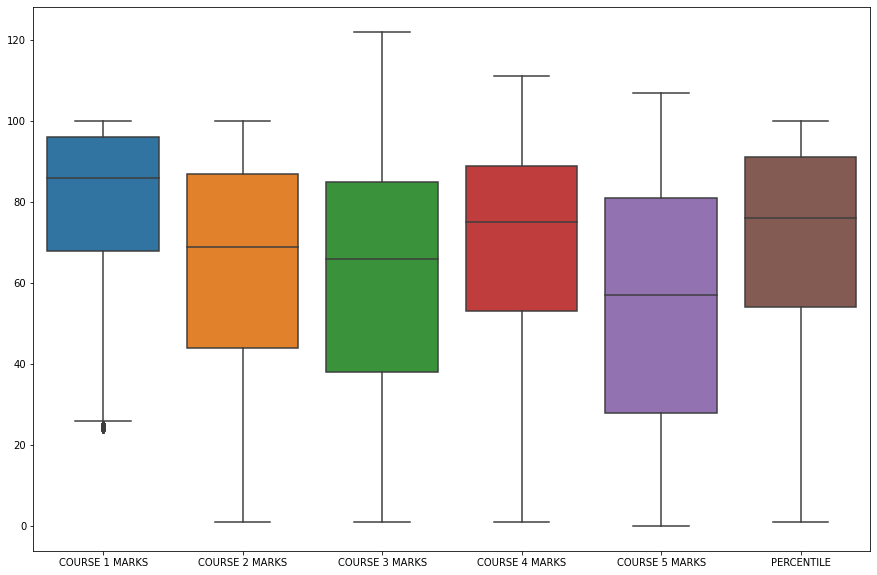

In [49]:
#IQR Method
qr1 = df['COURSE 1 MARKS'].quantile(0.25)
qr3= df['COURSE 1 MARKS'].quantile(0.75)

iqr = qr3-qr1

lower_bound = (qr1-iqr*1.5)
upper_bound = (qr3 + 1.5*iqr)

df = df[df['COURSE 1 MARKS']>lower_bound]
df = df[df['COURSE 1 MARKS']<upper_bound]

pyplot.figure(figsize=(15,10))
sns.boxplot(data=df)